-------------------------------------------------------
# **Question 8:  SAT SCORES ( 6 points)**
-------------------------------------------------------

## Description

You are going to analyze the complexity of the SAT exam from 2020. You have collected the SAT scores of 1000 students in _sat_score.csv_. You can assume that the scores are normally distributed.

## Questions

a. (2 points) Create one graph that visualizes both the data distribution and the probability density function (PDF) of the corresponding Gaussian distribution. Complete the provided code.

b. (2 points) Calculate the probability that a student scores less than 800 or more than 1300 in SAT exam. Complete the provided code.

c. (2 points) Find the range of scores a student can receive in order to be in the top 10% but not in the top 5%. Complete the code. Clearly identify which scores are included in the range.


## **Code**

### Preliminaries

In [1]:
# Import the packages
import pandas as pd  
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Load the dataset 
data = pd.read_csv('sat_score.csv')
print(data.shape)
print(data.head())

# Copy the dataset to avoid any changes to the original data
df = data.copy()

(1000, 2)
   student_id  score
0           1   1018
1           2   1218
2           3    611
3           4    723
4           5    541


### Part a

First, we estimate the parameters of the corresponding Gaussian distribution based on the dataset. After that, the 
PDF is computed and stored in the data frame _density_. This data frame can be used to plot the pdf.

In [3]:
# Estimate the mean and standard deviation of the SAT scores based on the data
mu = df["score"].mean()
sigma = df["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


In [4]:
# Compute the pdf corresponding to the estimated mean and standard deviation using norm.pdf()
density = pd.DataFrame() # create an empty data frame
density["x"] = np.linspace(df["score"].min(), df["score"].max(), 100) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu, sigma)

/Users/edwobbes/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


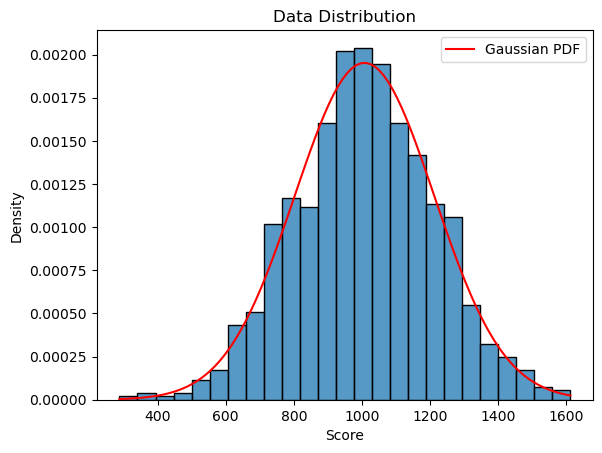

In [5]:
# Your code
# Visualize the data distribution and the pdf of the normal distribution
fig, ax = plt.subplots()
sns.histplot(df["score"], ax=ax, stat="density")
ax.plot(density["x"], density["pdf"], color="red", label="Gaussian PDF") 
plt.title("Data Distribution") 
plt.xlabel("Score")
plt.ylabel("Density")
ax.legend()
plt.show() 

### Part b

The cumulative probability can be computed using norm.cdf. To compute the desired probability that a student scores more than 1300 we use this function and properties A and D from the Review lecture.  

In [6]:
# Find the cumulative probability that a student scores less than 800
p_less_than_800 = norm.cdf(800, mu, sigma)

# Your code
# Find the probability that a student scores more than 1300
p_greater_than_1300 = 1 - norm.cdf(1300, mu, sigma)

# Add the above probabilities
p_desired = p_less_than_800 + p_greater_than_1300

print(f"The probability that a student scores less than 800 or more than 1300 is equal to {p_desired:.4f}.")

The probability that a student scores less than 800 or more than 1300 is equal to 0.2313.


### Part c

For this part the percent point function, norm.ppf, can be used. This function is an inverse of norm.cdf. 

In [7]:
# Calculate the 95th percentile score using ppf() function
score_top_five_percent = norm.ppf(0.95, mu, sigma)

# Your code
# Calculate the 90th percentile score using ppf() function
score_top_ten_percent = norm.ppf(0.90, mu, sigma)

print(f"A student can receive any score from the interval \
[{math.ceil(score_top_ten_percent)},{math.floor(score_top_five_percent)}] to be in the top 10% but not in the top 5%.")



A student can receive any score from the interval [1270,1343] to be in the top 10% but not in the top 5%.


----------------------------------------------------------------------------------------------
# **Question 9: STANDARD NORMAL DISTRIBUTION (6 points)**
----------------------------------------------------------------------------------------------

## Description 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. 

The admin knows that the SAT scores are normally distributed with mean 1000 and standard deviation 200, while the ACT scores are normally distributed with mean 20 and standard deviation 5. The highest score received from applicants who appeared for SAT is 1355 and the highest score received from applicants who appeared for ACT is 30.

Help the college to choose the best candidate for the fellowship.

## Questions

a. (2 points) Plot the distributions of the SAT and ACT scores. Visualize the top scores in your plots.

b. (1 point) Compute the Z-scores for both candidates.

c. (2 points) Plot the standard normal distribution. In the same graph, visualize the standardized scores from part b. 

d. (1 point) Who should receive the fellowship? Justify your answer.

## Code

### Part a

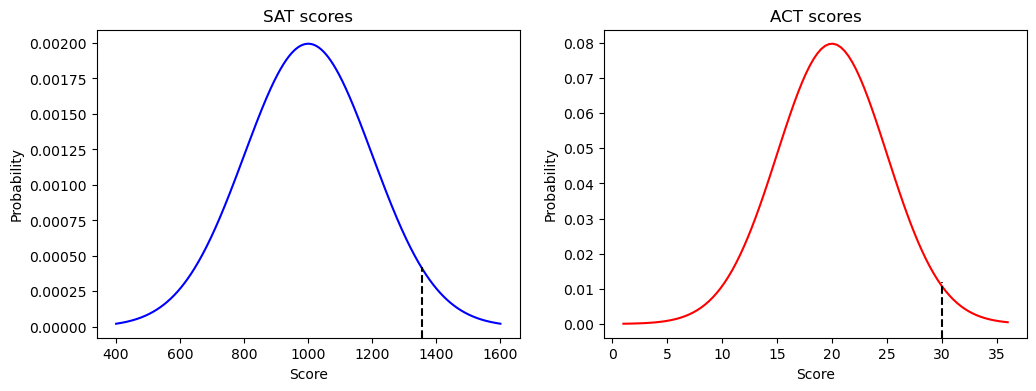

In [8]:
# Your code
# Plot the distributions using subplots
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
x = np.linspace(400, 1600, 1000)
ax1.plot(x, norm.pdf(x, loc = 1000, scale = 200), color = 'b')
ax1.set_title('SAT scores')
ax1.set_xlabel('Score')
ax1.set_ylabel('Probability')
ax1.axvline(1355, ymax = 0.23, linestyle = '--', color = 'black')
x1 = np.linspace(1, 36, 100)
ax2.plot(x1, norm.pdf(x1, loc = 20, scale = 5), color = 'r')
ax2.set_title('ACT scores')
ax2.set_xlabel('Score')
ax2.set_ylabel('Probability')
ax2.axvline(30, ymax = 0.18, linestyle = '--', color = 'black')
plt.show()

### Part b

In [9]:
# Your code
# Find the Z-score of highest scorer in the SAT exam
sat_top = (1355 - 1000) / 200
print(f"The Z-score of highest scorer in the SAT among all the applicants is equal to {sat_top:.2f}.")

# Find the Z-score of highest scorer in the ACT exam
act_top = (30 - 20) / 5
print(f"The Z-score of highest scorer in the ACT among all the applicants is equal to {act_top:.2f}.")

The Z-score of highest scorer in the SAT among all the applicants is equal to 1.77.
The Z-score of highest scorer in the ACT among all the applicants is equal to 2.00.


### Part c

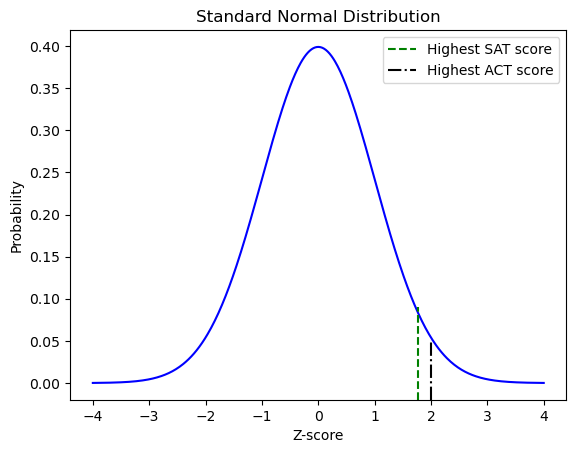

In [10]:
# Your code
# Plot the standard normal distribution and visualize the highest scores
fig, ax = plt.subplots()
x = np.linspace(-4,4,500)
ax.plot(x, norm.pdf(x, loc = 0, scale = 1), color = 'b')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-score')
ax.set_ylabel('Probability')
ax.axvline(sat_top, ymax = 0.25, linestyle = '--', color = 'green', label = 'Highest SAT score')
ax.axvline(act_top, ymax = 0.16, linestyle = '-.', color = 'black', label = 'Highest ACT score')
ax.legend()
plt.show()

### Part d

The person with the highest ACT score should receive the fellowship, because his Z-score is higher.